# Advanced Lane Finding


### Helper methods and constant definitions

In [1]:
import numpy as np
import math
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Polygon

%matplotlib inline

# prepare object points
NX = 9  # number of chessboard corners in the x direction
NY = 6  # number of chessboard corners in the y direction
DST_OFFSET = 100
SOBEL_MIN = 0
SOBEL_MAX = 180

### 1 & 2) Compute calibration matrix and distortion coefficients and apply a distortion correction to raw images.

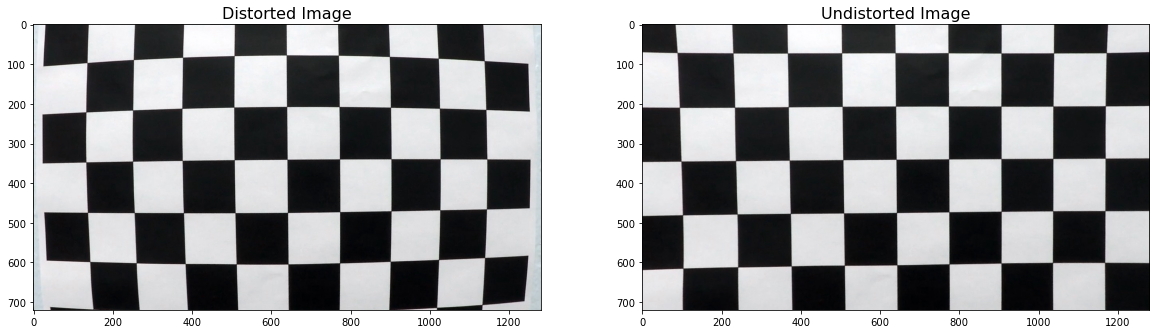

In [3]:
from advanced_lane_finding import plot_images, compute_distortion

# load calibration images
calib_images = glob.glob('camera_cal/*.jpg')

# compute the distortion matrix
matrix, distortion = compute_distortion(calib_images, NX, NY)

# load distorted a test image
distorted_img = cv2.imread('camera_cal/calibration1.jpg')

undistorted_img = cv2.undistort(distorted_img, matrix, distortion, None, matrix)
plot_images([distorted_img, 'Distorted Image'], [undistorted_img, 'Undistorted Image'])

### 3) Use color transforms, gradients, etc., to create a thresholded binary image.

#### 3.1) Calculate Sobel X / Y

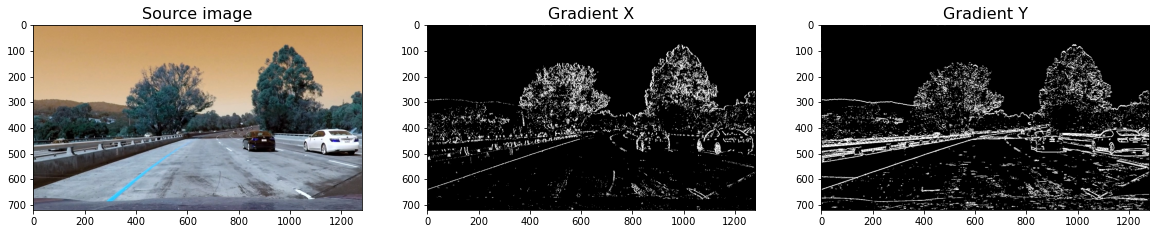

In [3]:
import cv2
from advanced_lane_finding import plot_images, sobel_thresh

img = cv2.imread('test_images/test1.jpg')
grad_x = sobel_thresh(img, 15, 20, 200, orient='x')
grad_y = sobel_thresh(img, 15, 20, 200, orient='y')

plot_images([img, 'Source image'], [grad_x, 'Gradient X'], [grad_y, 'Gradient Y'], num_cols=3)

#### 3.2) Calculate the magnitude of the gradient and find points that fall within the threshold

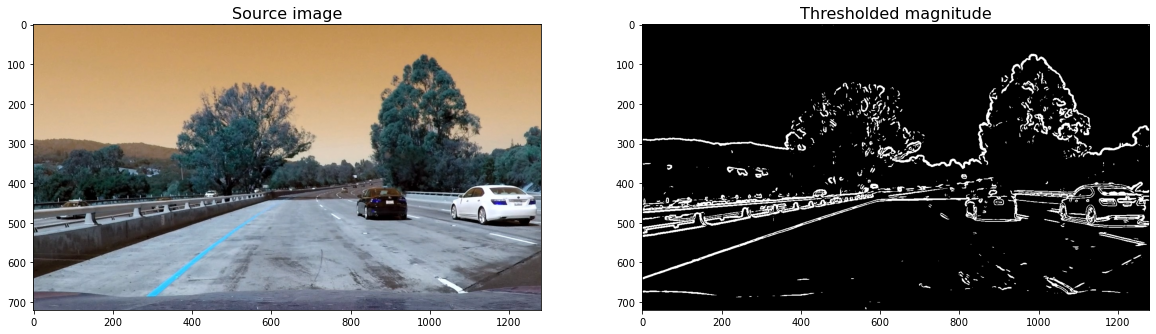

In [1]:
import cv2
from advanced_lane_finding import plot_images, magnitude_threshold

img = cv2.imread('test_images/test1.jpg')
mag_binary = magnitude_threshold(img, 15, 50, 150)

plot_images([img, 'Source image'], [mag_binary, 'Magnitued Gradient Threshold Applied'])

### 3.3) Calculate the directional magnitude with a threshold

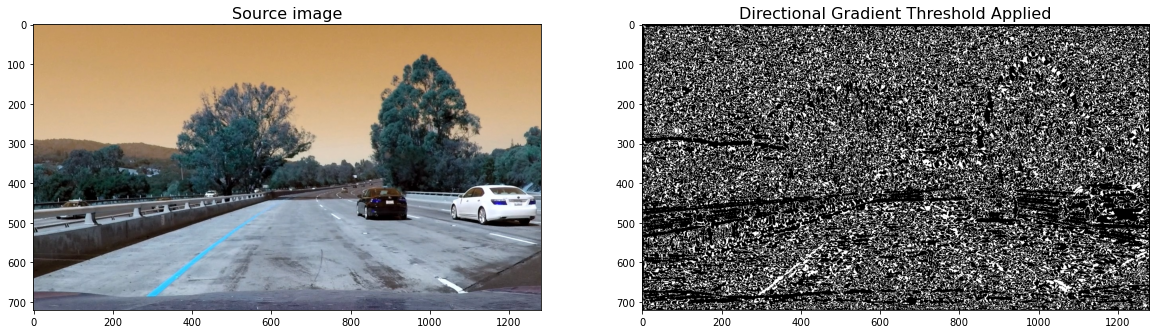

In [1]:
import cv2
from advanced_lane_finding import plot_images, directional_threshold

img = cv2.imread('test_images/test1.jpg')

dir_binary = directional_threshold(img, 15, 0.7, 1.2)
plot_images([img, 'Source image'], [dir_binary, 'Directional Gradient Threshold Applied'])

### 3.4) Apply threshold to image with hls color space

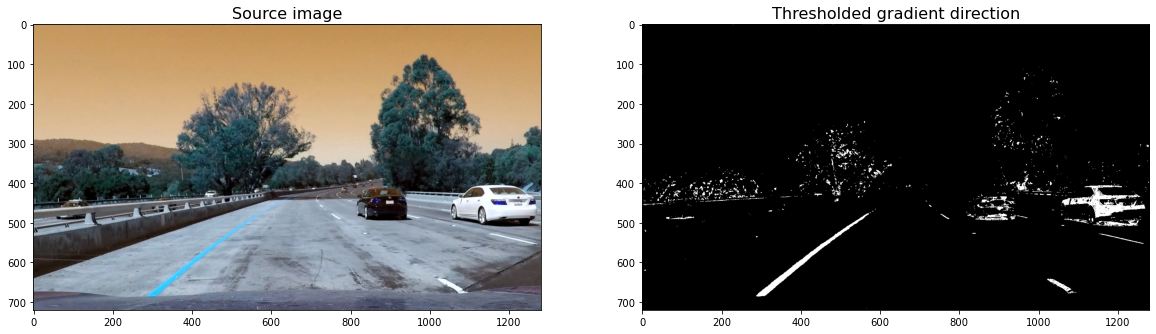

In [2]:
import cv2
from advanced_lane_finding import plot_images, hls_threshold

img = cv2.imread('test_images/test1.jpg')

hls_binary = hls_threshold(img, 160, 255)
plot_images([img, 'Source image'], [hls_binary, 'Thresholded gradient direction'])

### 3.5) Combine the binary images into 1 image

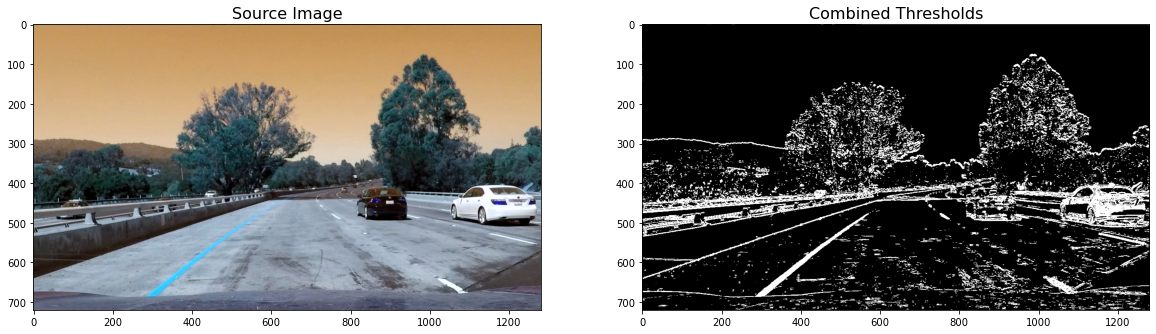

In [1]:
import cv2
from advanced_lane_finding import plot_images, threshold_binary

img = cv2.imread('test_images/test1.jpg')

combined_binary = threshold_binary(img)
plot_images([img, 'Source Image'], [combined_binary, 'Combined Thresholds'])

## 4) Perspective Transform

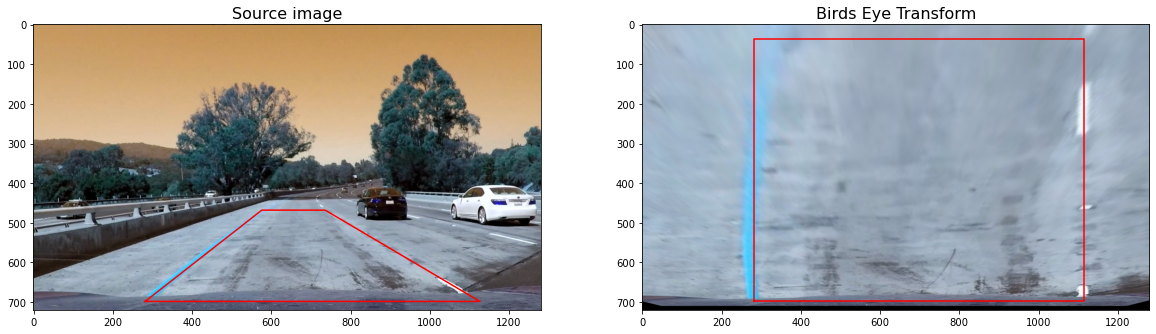

In [2]:
import cv2
from advanced_lane_finding import plot_images, birds_eye_transform, matrix_to_polygon

img = cv2.imread('test_images/test1.jpg')
bet = birds_eye_transform(img)
src_p, dst_p = matrix_to_polygon(img=img)

plot_images([img, 'Source image', src_p], [bet, 'Birds Eye Transform', dst_p])

# 5 Detect lane pixels and fit to find the lane boundary.


###  5.1 Use a histogram to map image point counts to find dense areas of pixels in the x direction

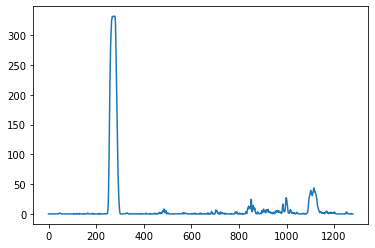

In [3]:
import cv2
import matplotlib.pyplot as plt

from advanced_lane_finding import plot_images, calculate_hist, threshold_binary, birds_eye_transform

img = cv2.imread('test_images/test1.jpg')
combined_binary = threshold_binary(img)
birds_eye_bin = birds_eye_transform(combined_binary)
histogram = calculate_hist(birds_eye_bin)

plt.plot(histogram)

### 5.2 Fit a polynomial to the line using the histogram for each window

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


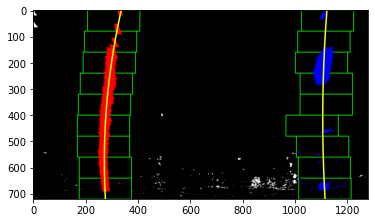

In [5]:
import cv2
import matplotlib.pyplot as plt

from advanced_lane_finding import plot_images, calculate_hist, threshold_binary, birds_eye_transform, \
    fit_polynomial, show_polynomial

img = cv2.imread('test_images/test1.jpg')
combined_binary = threshold_binary(img)
birds_eye_bin = birds_eye_transform(combined_binary)

left_fit, right_fit, result = fit_polynomial(birds_eye_bin, color_lanes=True, draw_windows=True)
show_polynomial(result, left_fit, right_fit)

### 5.3) Use the existing fit to search for the lane line in the most probable area

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


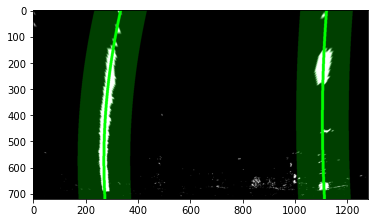

In [5]:
import cv2
import matplotlib.pyplot as plt

from advanced_lane_finding import plot_images, calculate_hist, threshold_binary, birds_eye_transform, \
    fit_polynomial, show_polynomial, search_around_poly, overlay_search_area, add_lines

# load the image
source_image = cv2.imread('test_images/test1.jpg')

# get the binary image with the default thresholds
source_threshold_binary = threshold_binary(source_image)

# transform to get the birds eye view
birds_eye = birds_eye_transform(source_threshold_binary)

# calculate the initial fit
left_fit, right_fit, birds_eye_lane_fit_a = fit_polynomial(birds_eye)

# use the left and right fit to search the calculate fits on a specific search area
left_fit, right_fit, birds_eye_lane_fit_b = search_around_poly(birds_eye, left_fit, right_fit)


img = add_lines(birds_eye_lane_fit_b, left_fit)
img = add_lines(img, right_fit)
img = overlay_search_area(left_fit, right_fit, img=img)

plt.imshow(img)

#left_fit, right_fit, birds_eye_lane_fit_b = search_around_poly(birds_eye_binary, left_fit, right_fit)

# plot_images([birds_eye_lane_fit_a, 'Source image'], [birds_eye_overlay, 'Birds Eye Transform'])

In [5]:
import numpy as np
np.dstack((birds_eye_overlay, birds_eye_overlay, birds_eye_overlay))*255

array([[[62.52978516, 62.52978516, 62.52978516, ..., 62.52978516,
         62.52978516, 62.52978516],
        [50.42724609, 50.42724609, 50.42724609, ..., 50.42724609,
         50.42724609, 50.42724609],
        [38.32470703, 38.32470703, 38.32470703, ..., 38.32470703,
         38.32470703, 38.32470703],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[67.01220703, 67.01220703, 67.01220703, ..., 67.01220703,
         67.01220703, 67.01220703],
        [45.49658203, 45.49658203, 45.49658203, ..., 45.49658203,
         45.49658203, 45.49658203],
        [37.65234375, 37.65234375, 37.65234375, ..., 37.65234375,
         37.65234375, 37.65234375],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  